In [3]:
import pandas as pd
import numpy as np

# Китайский фондовый рынок

Фондовый рынок КНР является вторым крупнейшим в мире после фондового рынка США, на конец 2020 года его капитализация составляла 80 трлн юаней (12 трлн долларов). Его основу составляют две фондовые биржи, Шанхайская и Шэньчжэньская, открытые в начале 1990-х годов; в ноябре 2021 года начала работу Пекинская фондовая биржа. Гонконгская биржа, основанная в 1891, на данный момент 

На февраль 2022 года на Шанхайской фондовой бирже котировались акции 2057 компаний и 2099 наименований ценных бумаг. Рыночная капитализация биржи составляла 49,2 трлн юаней.
На Шэньчжэньской фондовой бирже котировались акции 2600 компаний и 14 тысяч наименований ценных бумаг, рыночная капитализация биржи составляла 36,2 трлн юаней.
Гонконгская фондовая биржа по состоянию на начало 2014 года имела капитализацию 22,89 трлн гонконгских долларов (2,96 трлн в долларах). По данному показателю биржа стояла на 6 месте по капитализации обращающихся на ней компаний.

### Рассчет эффективности и рисков
Для начала на основе собранных ценовых данных за 2016 год, построим логарифмическую доходность

In [ ]:
data = pd.read_excel('outputNewSZ_SS_HK.xlsx')
for i in range(len(data.columns)):
    data.iloc[:, i] = np.log1p(data.iloc[:, i].pct_change()) # подсчёт логарифмической доходности
data.to_excel('outputNewSZ_SS_HKReturns.xlsx', index=False)

### Подсчёт эффективности и риска:

In [25]:
data = pd.read_excel('outputNewSZ_SS_HKReturns.xlsx')
eff = np.array([data.iloc[:, i].mean() for i in range(len(data.columns))]) # подсчёт эффективности

In [27]:
data -= eff[i]
data = data ** 2
risk = np.array([np.sqrt((data.iloc[:, i].sum()) / (len(data) - 1)) for i in range(len(data.columns))]) # подсчёт риска

In [29]:
print(eff)
print(risk)
data_er = pd.DataFrame({'company': data.columns, 'effiency': eff,'risk': risk}) # сбор данных в один датафрейм
data_er.to_excel('outputNewSZ_SS_HKEffRisk.xlsx', index=False)

[-9.09232930e-05 -5.42974958e-04  3.42934955e-04 ... -1.71224989e-03
  5.89159862e-04  3.71577141e-03]
[0.01217405 0.02469429 0.02613337 ... 0.0269185  0.0188089  0.0273762 ]



По выводу уже заметно сильное различие между эффективностью и плотностью, эффективность в 10 раз ниже рисков


### Строим график эффективности от рисков:

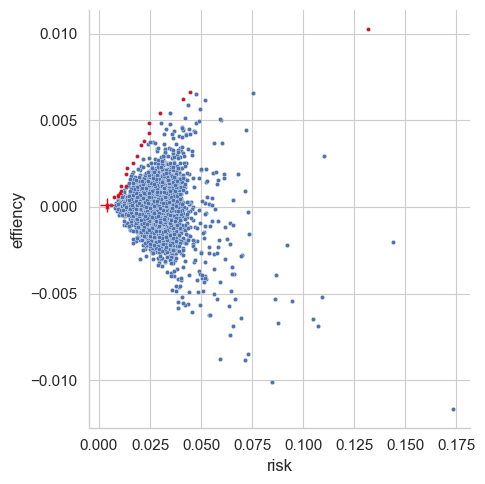

In [335]:
import seaborn as sns

sns.set_theme('paper', font_scale=1.25)

#data_eff_risk = pd.DataFrame({'effiency': eff,'risk': risk, 'company': data.columns})
data_eff_risk = pd.read_excel('outputNewSZ_SS_HKEffRisk.xlsx')
sns.set_style("whitegrid")
sns.color_palette("bright")
import matplotlib.pyplot as plt
sns.relplot(
    data=data_eff_risk,
    x="risk", y="effiency", s=10
) # график эффективности от рисков
'''data_eff_risk = data_eff_risk.sort_values(by='effiency', ascending=False)
marker = -1
companies, effiency, risk = [], [], []
for i in range(len(data_eff_risk['effiency'])):
    marker = i
    for j in range(len(data_eff_risk['effiency'])):
        if (data_eff_risk.at[i, 'effiency'] < data_eff_risk.at[j, 'effiency']) and (data_eff_risk.at[i, 'risk'] > data_eff_risk.at[j, 'risk']):
            marker = -1
    if marker != -1:
        companies.append(data_eff_risk.at[marker, 'company'])
        effiency.append(data_eff_risk.at[marker, 'effiency'])
        risk.append(data_eff_risk.at[marker, 'risk'])
        marker = -1
'''
data_pareto_optimal = pd.read_excel('outputNewSZ_SS_HKParetoOptimal_2.xlsx')
plt.plot([0.00368849525538986], [0.000143987796974235], marker='+', color='red', markerfacecolor='red', markersize=10) # лучший по VaR и CVaR
plt.scatter(data_pareto_optimal['risk'], data_pareto_optimal['effiency'], color='red', s=2)
plt.savefig('ParetoSZ_SS_HK.png')

#data_pareto_optimal.to_excel('outputNewSZ_SS_HKParetoOptimal.xlsx', index=False)

В целом, по графику заметна низкая эффективность и высокие риски на рынке. То есть эффективность большинства акции в 5-10 раз меньше риска, что говорит о нестабильности текущей ситуации на рынке.

### Построение VaR и CVaR

In [315]:
dataPareto = pd.read_excel('outputNewSZ_SS_HKParetoOptimal_2.xlsx')
data_VaR = pd.read_excel('outputNewSZ_SS_HKReturns.xlsx', usecols=dataPareto['company'])
data_VaR.to_excel('outputNewSZ_SS_HKReturnsVaR.xlsx', index=False) # их нужно отсортировать,каждый столбец от меньшего к большему

In [319]:
data_VaR = pd.read_excel('outputNewSZ_SS_HKReturnsVaR.xlsx')
for col in data_VaR.columns:
    data_VaR[col] = np.sort(data_VaR[col])
data_VaR.to_excel('outputNewSZ_SS_HKReturnsVaR.xlsx', index=False)

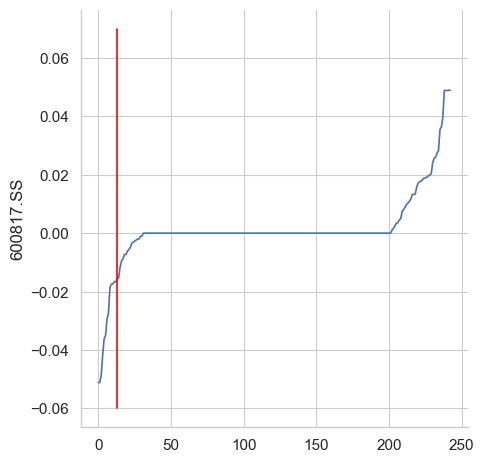

In [325]:
sns.relplot(data=data_VaR, kind="line", x=np.arange(247), y="600817.SS")
plt.plot([13, 13], [-0.06, 0.07], color="red") # линия отсечения (5%)
# VaR = -0,0156358062721579

In [327]:
import yfinance as yf
names = []
for i in data_VaR.columns:
    try:
        names.append(yf.Ticker(i).info['longName'])
    except KeyError:
        names.append('NoName')
new_data_VaR = pd.DataFrame({'company': data_VaR.columns, 'VaR': data_VaR.iloc [13], 'company_name': names}) # 13 потому что в сортированном от меньшего к большему 13 элемент будет 5% от 243 дней
new_data_VaR.to_excel('outputReturnsNewSZ_SS_HKVaRResult.xlsx', index=False)

In [329]:
data_СVaR = pd.DataFrame({'company': data_VaR.columns, 'СVaR': data_VaR.iloc[1:14].mean(), 'company_name': names})
data_СVaR.to_excel('outputReturnsNewCVaRSZ_SS_HKResult.xlsx', index=False)

*Замечание: в ходе исследования выявлялись акции с околонулевой или нулевой доходностью. Возможно это последствия кризиса 2015 года, из-за чего некоторые компании просто приостановили торги на бирже. Да и нестабильность можно объяснить этим кризисом*

# Исследование на случайность

In [337]:
data = pd.read_excel('outputNewSZ_SS_HKParetoOptimal_2.xlsx')
import yfinance as yf
names = []
sector = []
for i in data['company']:
    try:
        names.append(yf.Ticker(i).info['longName'])
    except KeyError:
        names.append('NoName')
for i in data['company']:
    try:
        sector.append(yf.Ticker(i).info['sector'])
    except KeyError:
        sector.append('NoName')
dataX = pd.read_excel('outputNewSZ_SS_HK.xlsx', usecols=data['company'])
price = []
for col in dataX.columns:
    price.append(dataX[col].mean())
new_data= pd.DataFrame({'ticker': data['company'], 'price': price, 'company_name': names, 'sector': sector})
new_data.to_excel('outputCheckSZ_SS_HK_2.xlsx', index=False)

In [344]:
#Проверка случайности
dataCheck = pd.read_excel('outputCheckSZ_SS_HK_2.xlsx')
data = pd.read_excel('outputNewSZ_SS_HKReturns.xlsx', usecols=dataCheck['ticker'])
def getInvCount(arr, n):
    inv_count = 0
    for i in range(n):
        for j in range(i + 1, n):
            if (arr[i] > arr[j]):
                inv_count += 1
    if (inv_count > 14783.1664) and (inv_count <= 14862.8336):
        return True
    else:
        return False

res = []
for col in data.columns:
    res.append(getInvCount(data[col], len(data[col])))
companies = ['300459.SZ', '300072.SZ', '002777.SZ', '200028.SZ', '300491.SZ', '600519.SS', '0425.HK', '0440.HK', '1888.HK']
data = pd.read_excel('outputNewSZ_SS_HKReturns.xlsx', usecols=companies)
for col in companies:
    res.append(getInvCount(data[col], len(data[col])))
print(res)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False]


Только для Kweichow Moutai Co., Ltd. гипотеза случайности не отвергается. Случайность далее подтвердится также с помощью автокорреляции.

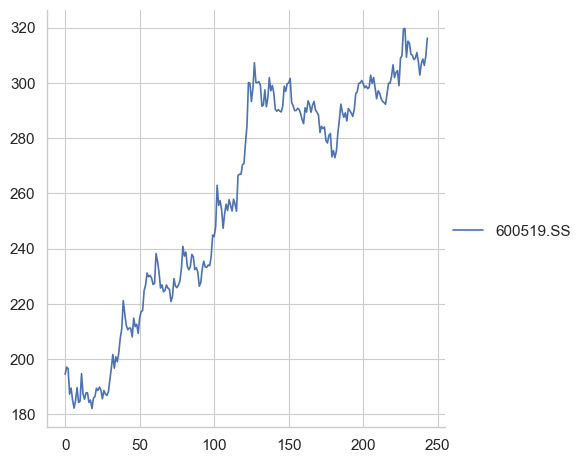

In [401]:
data = pd.read_excel('outputNewSZ_SS_HK.xlsx', usecols=['600519.SS'])
sns.set_style("whitegrid")
sns.color_palette("bright")
import matplotlib.pyplot as plt
sns.relplot(
    data=data, kind='line'
)

## Проверка нормальности

Для дальнейшей проверки отберем 8 компаний:
|                           Компания                         |           Сектор           |                                 Спецификация                                 |
|:-----------------------------------------------------------|:---------------------------|:-----------------------------------------------------------------------------|
| Zhejiang Jinke Tom Culture Industry Co., LTD.              | Communication Services     | Распространение индустрии развлечений и разработка Talking Tom Cat Family    |
| Beijing Haixin Energy Technology Co.,Ltd.Basic Materials   | Basic Materials            | Производство очистителей и катализаторов для нефти, газа, угля и тд          |
| Sichuan Jiuyuan Yinhai Software.Co.,Ltd	                   | Technology                 | Медицинское страхование, цифровое правительство и умные города               |
| China National Accord Medicines Corporation Ltd.	         | Healthcare                 | Продажа и дистрибьюция фармацевтики                                          |
| Shijiazhuang Tonhe Electronics Technologies Co.,Ltd.       | Industrials                | Источники питания, ИБП/инверторные источники питания для электроснабжения    |
| Kweichow Moutai Co., Ltd.	                                 | Consumer Defensive         | Продажа и производство ликеро-водочной продукции                             |
| Minth Group Limited                                        |  Consumer Cyclical         | Разработка, производство и продажа автомобильных деталей                     | 
| Dah Sing Financial Holdings Limited                        |   Financial Services       | Банковские, страховые, финансовые и другие сопутствующие услуги              |



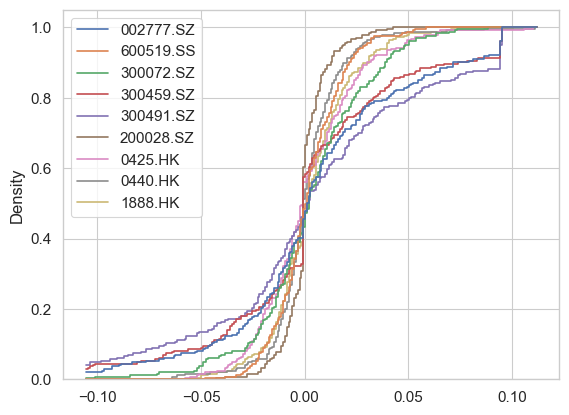

In [410]:
# Графики распределений
companies = ['300459.SZ', '300072.SZ', '002777.SZ', '200028.SZ', '300491.SZ', '600519.SS', '0425.HK', '0440.HK', '1888.HK']
''' Zhejiang Jinke Tom Culture Industry Co., LTD.	               Communication Services
    Beijing Haixin Energy Technology Co.,Ltd.	                   Basic Materials
    Sichuan Jiuyuan Yinhai Software.Co.,Ltd	                       Technology
    China National Accord Medicines Corporation Ltd.	           Healthcare
    Shijiazhuang Tonhe Electronics Technologies Co.,Ltd.	       Industrials
    Kweichow Moutai Co., Ltd.	                                   Consumer Defensive
    Minth Group Limited                                            Consumer Cyclical
    Dah Sing Financial Holdings Limited                            Financial Services
    '''

import seaborn as sns
data = pd.read_excel('outputNewSZ_SS_HKReturns.xlsx', usecols=companies)
#sns.kdeplot(data, cumulative=True) #Кумулятивная функция распределения
#sns.kdeplot(data=data, common_norm=False); #график плотности
sns.histplot(data=data, bins=len(data['0440.HK']), stat="density", element="step", fill=False, cumulative=True, common_norm=False); #эмпирическая функция распределения
plt.savefig('Density.png')

Видно, что график очень похож на функцию нормального распределения

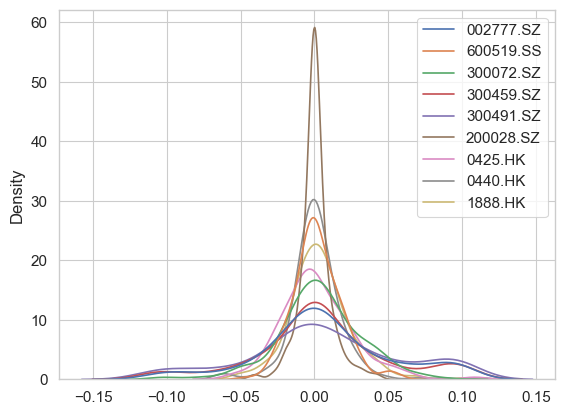

In [412]:
sns.kdeplot(data=data, common_norm=False);
plt.savefig('Density_2.png')

Как и здесь, график похож на график функции плотности

In [355]:
#Тест Шапиро-Уилка и тест Д’Агостино и Пирсона на нормальность выборки
from scipy.stats import shapiro, normaltest
companies = ['300459.SZ', '300072.SZ', '002777.SZ', '200028.SZ', '300491.SZ', '600519.SS', '0425.HK', '0440.HK']
data = pd.read_excel('outputNewSZ_SS_HKReturns.xlsx', usecols=companies)
for col in data.columns:
    print(col)
    print(shapiro(data[col], nan_policy='omit'), normaltest(data[col], nan_policy='omit'))

002777.SZ
ShapiroResult(statistic=0.9523214120958069, pvalue=3.63529100610579e-07) NormaltestResult(statistic=1.556481674522615, pvalue=0.4592131317995075)
600519.SS
ShapiroResult(statistic=0.9821759009631466, pvalue=0.003815521887607327) NormaltestResult(statistic=13.620980796026679, pvalue=0.0011021522741219917)
300072.SZ
ShapiroResult(statistic=0.9741298345934732, pvalue=0.00020503813050379432) NormaltestResult(statistic=15.365200054884017, pvalue=0.0004607753115229773)
300459.SZ
ShapiroResult(statistic=0.9308257752761213, pvalue=2.9667765408179777e-09) NormaltestResult(statistic=3.257744574843526, pvalue=0.1961506510042593)
300491.SZ
ShapiroResult(statistic=0.9561162057294177, pvalue=9.617480318499513e-07) NormaltestResult(statistic=0.8256937030599645, pvalue=0.6617636231539917)
200028.SZ
ShapiroResult(statistic=0.901123245244975, pvalue=1.4791836685026504e-11) NormaltestResult(statistic=29.85318692274929, pvalue=3.292022737161578e-07)
0425.HK
ShapiroResult(statistic=0.959952528163

Однако, тесты не дают однозначного ответа. Тест Д’Агостино и Пирсона признаёт в некоторых нормальность, в то время как тест Шапиро-Уилка - нет (что скорее связано с точностью тестов). Очевидно, что утверждать нормальность распределения нельзя, так как акции всё-таки зависят от внешних факторов, но тенденция к стремлению к нормальному распределению видна. Особенностью можно назвать только, что математическое ожидание почти у всех колеблется у 0, а вот 'хвосты' гораздо более существенны.

## Исследование акций с помощью функции автокорреляции

In [372]:
companies = ['300459.SZ', '300072.SZ', '002777.SZ', '200028.SZ', '300491.SZ', '600519.SS', '0425.HK', '0440.HK']
import yfinance as yf

for company in companies:
    data = pd.DataFrame(yf.download(company, start='2016-01-01', end='2016-12-31', interval='1d', auto_adjust=True, group_by='ticker'))
    data.to_excel('outputAll_'+company+'.xlsx')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

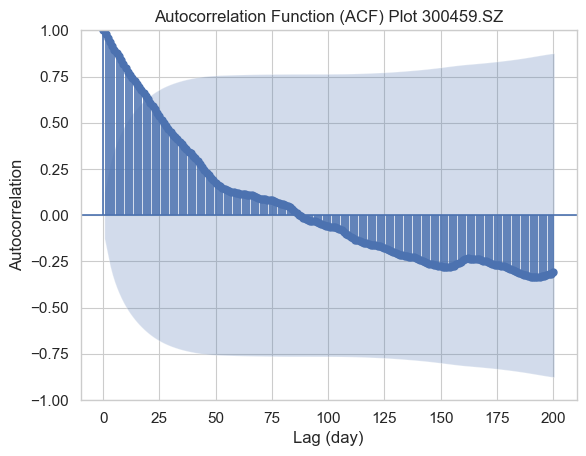

<Figure size 1200x600 with 0 Axes>

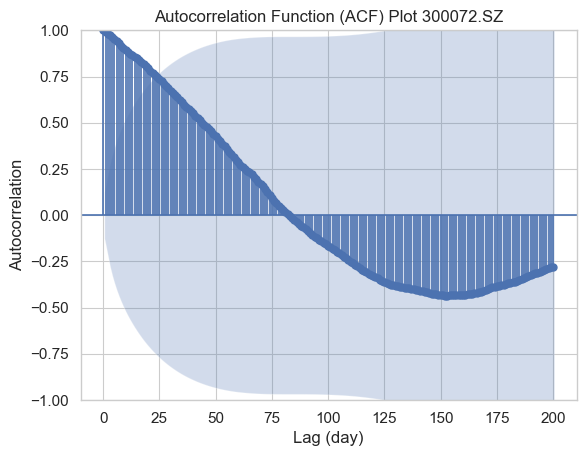

<Figure size 1200x600 with 0 Axes>

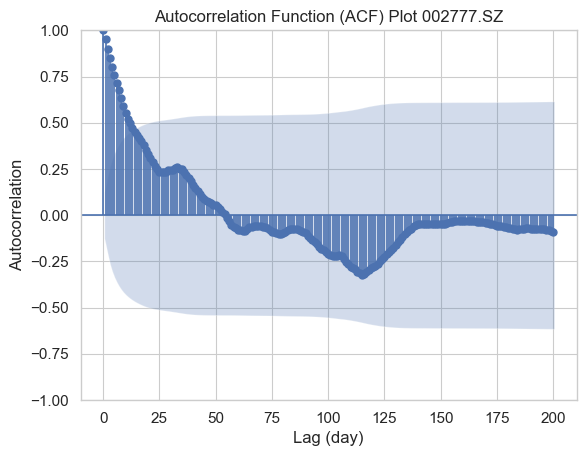

<Figure size 1200x600 with 0 Axes>

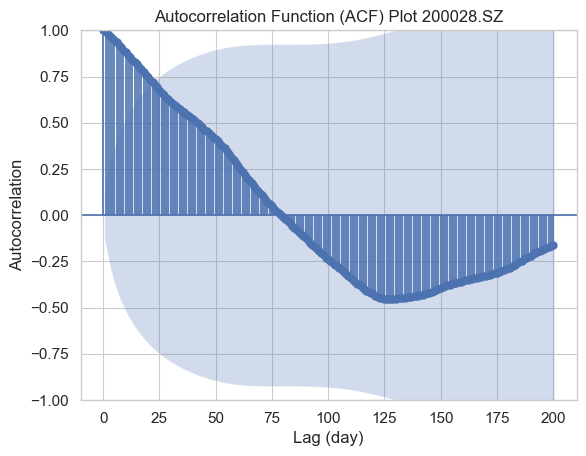

<Figure size 1200x600 with 0 Axes>

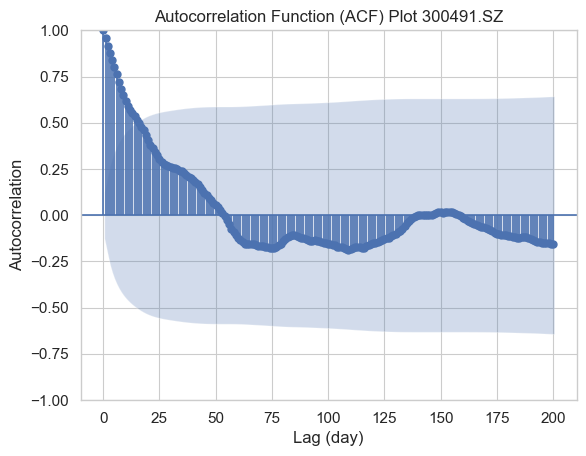

<Figure size 1200x600 with 0 Axes>

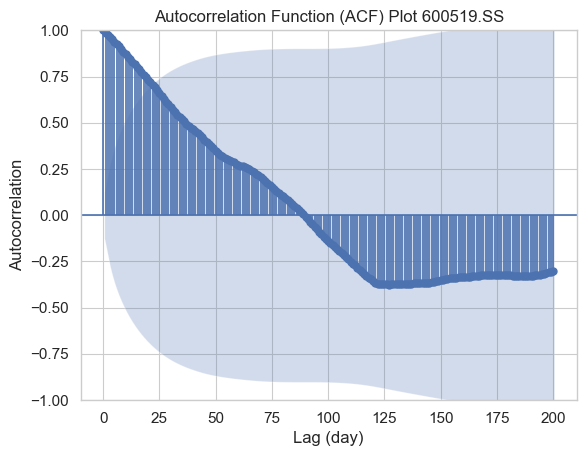

<Figure size 1200x600 with 0 Axes>

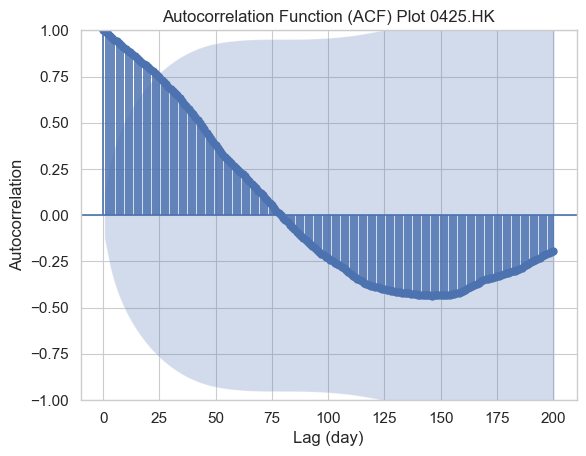

<Figure size 1200x600 with 0 Axes>

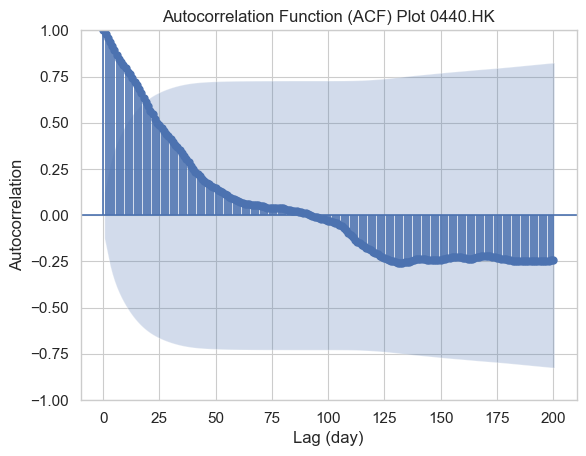

In [378]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Строим ACF для цен
companies = ['300459.SZ', '300072.SZ', '002777.SZ', '200028.SZ', '300491.SZ', '600519.SS', '0425.HK', '0440.HK']
for company in companies:
    data = pd.read_excel('outputAll_'+company+'.xlsx')
    data.set_index('Date', inplace=True)
    plt.figure(figsize=(12, 6))
    plot_acf(data['Close'], lags=200)
    plt.xlabel('Lag (day)')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Function (ACF) Plot ' + company)
    plt.savefig('ACF_Close_'+company[:-3]+'.png')
    plt.show()

<Figure size 1200x600 with 0 Axes>

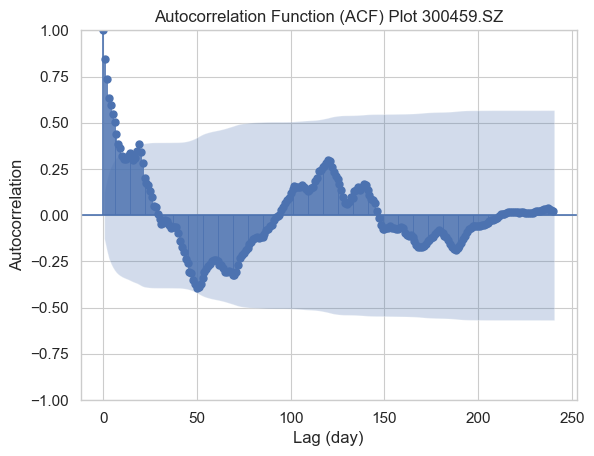

<Figure size 1200x600 with 0 Axes>

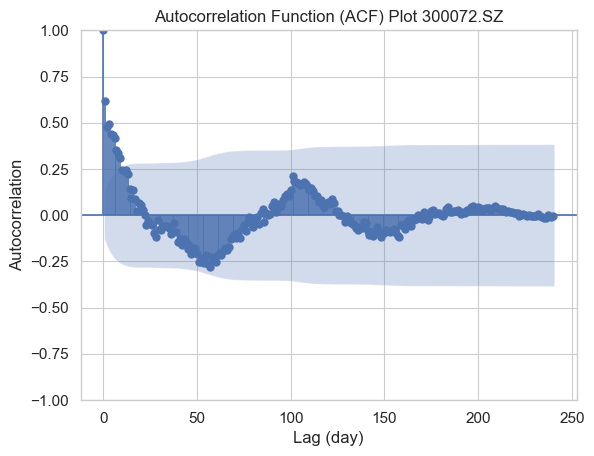

<Figure size 1200x600 with 0 Axes>

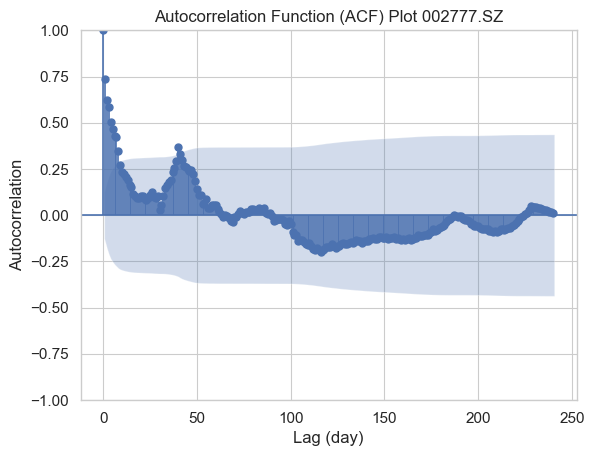

<Figure size 1200x600 with 0 Axes>

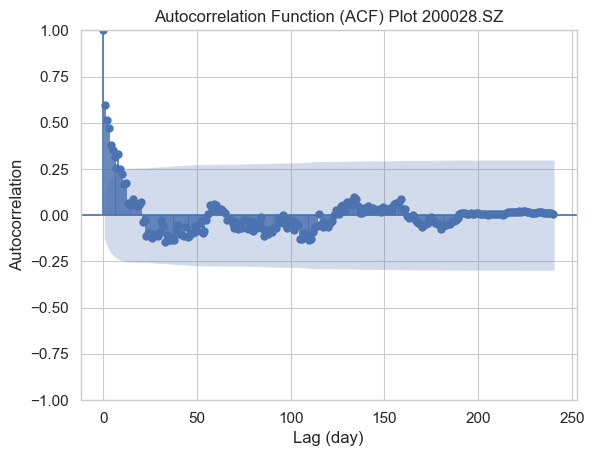

<Figure size 1200x600 with 0 Axes>

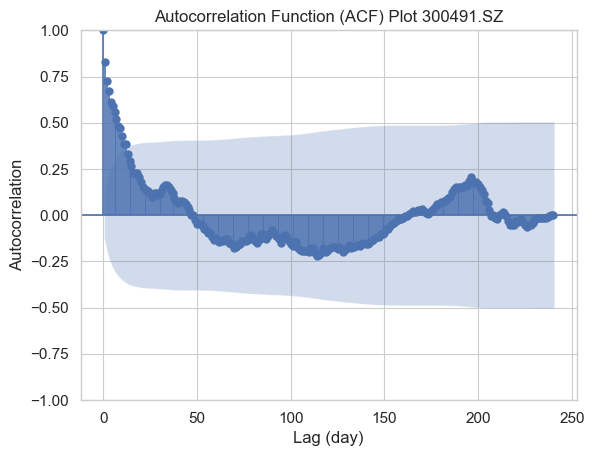

<Figure size 1200x600 with 0 Axes>

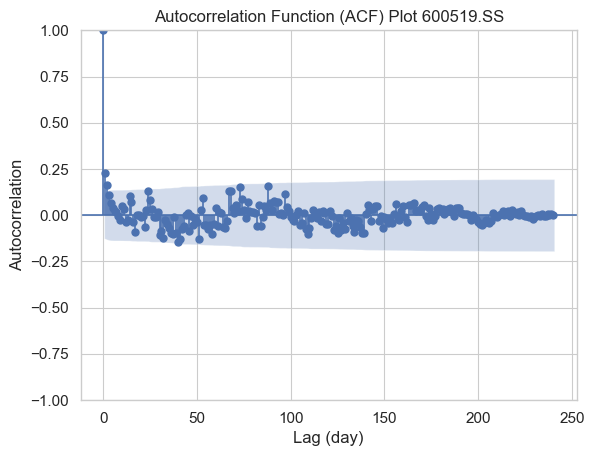

<Figure size 1200x600 with 0 Axes>

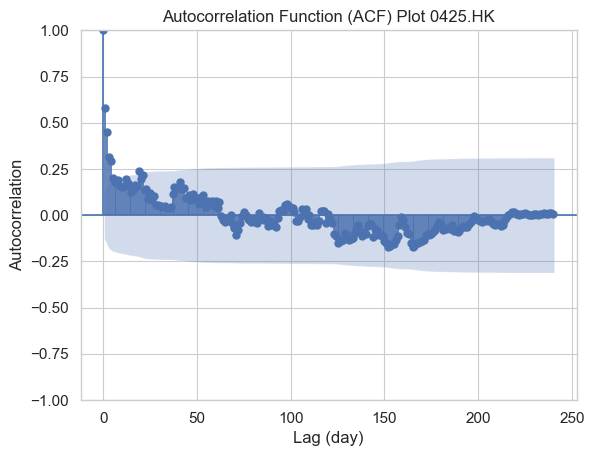

<Figure size 1200x600 with 0 Axes>

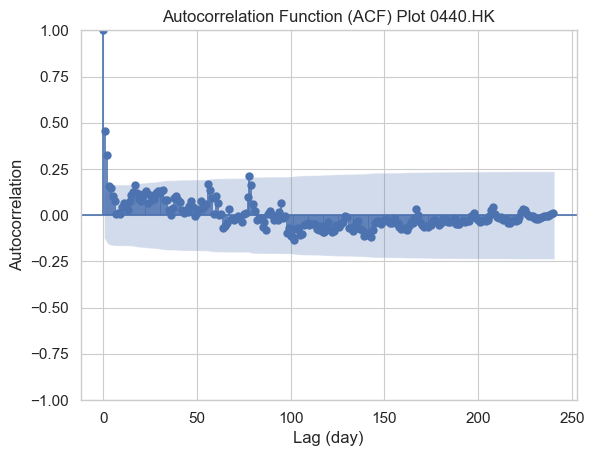

In [382]:
#ACF для объемов торгов
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Строим график автокорреляционной функции
companies = ['300459.SZ', '300072.SZ', '002777.SZ', '200028.SZ', '300491.SZ', '600519.SS', '0425.HK', '0440.HK']
for company in companies:
    data = pd.read_excel('outputAll_'+company+'.xlsx')
    data.set_index('Date', inplace=True)
    plt.figure(figsize=(12, 6))
    plot_acf(data['Volume'], lags=240)
    plt.xlabel('Lag (day)')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Function (ACF) Plot ' + company)
    plt.savefig('ACF_Volume_'+company[:-3]+'.png')
    plt.show()

Например, можно заметить пологие графики АКФ, что говорит о высокой корреляции цен в течение первых ~35 дней. То есть, можно утверждать, что положительные изменения в цене будут гарантировать продолжение подъема. Графики объёмов же, не так однозначны, например для первого графика (компания по развлечениям) имеет синусоидальную форму с двумя пиками. Можно предположить сезонность компании, что, в принципе, объяснимо её деятельностью.

Но, например, компания 600519.SS (Kweichow Moutai Co., Ltd.), производящая и продающая алкогольную продукцию демонстрирует малую зависимость от торгов предыдущих дней. Учитывая положительную динамику цены, хороший показатель АКФ для цен, можно предположить длительный рост цены акции.

### Итоги
Заметно, что Китайский фондовый рынок является рискованным для вложений. Лишь малая часть акций предоставляет интерес. Также заметно, что Парето оптимальные активы не обязательно являются самыми доходными (объяснимо выборкой в год), та же 600519.SS (Kweichow Moutai Co., Ltd.), близка к оптимальным, но не входит в них.